<a href="https://colab.research.google.com/github/faiz-ali-chishti/deep-learning-using-tensorflow-keras/blob/main/cnn_flower_image_classification_data_augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Augmentation To Address Overfitting In Flower Classification CNN**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Load flowers dataset

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [9]:
list(data_dir.glob('flower_photos/*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/537625768_791e973b40.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8674140377_ae7b0be523.jpg')]

In [10]:
image_count = len(list(data_dir.glob('flower_photos/*/*.jpg')))
print(image_count)

3670


In [8]:
import os
print(os.listdir(data_dir))

['flower_photos']


In [14]:
roses = list(data_dir.glob('flower_photos/roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/537625768_791e973b40.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8674140377_ae7b0be523.jpg')]

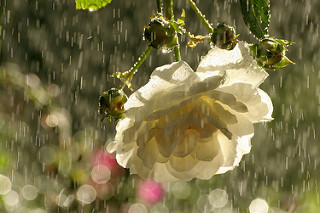

In [17]:
PIL.Image.open(str(roses[1]))

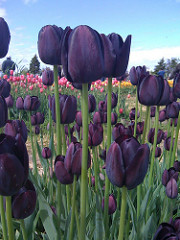

In [18]:
tulips = list(data_dir.glob('flower_photos/tulips/*'))
PIL.Image.open(str(tulips[0]))

## Read flowers images from disk into numpy array using opencv

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.glob('flower_photos/roses/*')),
    'daisy': list(data_dir.glob('flower_photos/daisy/*')),
    'dandelion': list(data_dir.glob('flower_photos/dandelion/*')),
    'sunflowers': list(data_dir.glob('flower_photos/sunflowers/*')),
    'tulips': list(data_dir.glob('flower_photos/tulips/*')),
}

In [21]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [22]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/537625768_791e973b40.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8674140377_ae7b0be523.jpg')]

In [27]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/9300754115_dd79670066_n.jpg'

In [31]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(250, 320, 3)

In [32]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [33]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [34]:
y[:5]

[0, 0, 0, 0, 0]

In [35]:
X = np.array(X)
y = np.array(y)

## Train test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Preprocessing: scale images

In [39]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## Build convolutional neural network and train it

In [40]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3457 - loss: 1.6218
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5977 - loss: 0.9925
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7206 - loss: 0.7625
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8117 - loss: 0.5363
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8609 - loss: 0.3662
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9339 - loss: 0.2244
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9470 - loss: 0.1664
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9839 - loss: 0.0648
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9850 - loss: 0.0661
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9679 - loss: 0.1069
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9785 - loss: 0.0709
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy:

In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6580 - loss: 2.5377


[2.5301015377044678, 0.6481481194496155]

### Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (64.81%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [42]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


array([[  5.6134667 ,  26.514034  , -15.450748  , -26.956379  ,
        -24.383171  ],
       [ 10.619342  , -10.8576565 ,  -9.152065  ,  -8.4727125 ,
         11.905134  ],
       [ -4.0652776 ,  -3.1128652 ,   8.809216  ,  -1.7114633 ,
         -3.8332703 ],
       ...,
       [ -9.625713  ,  -4.0509963 ,   1.5720866 ,   0.1203174 ,
         -5.7847548 ],
       [ 10.139326  ,  -0.36572978,  -0.96115464, -16.856901  ,
         10.086352  ],
       [ -8.199407  , -16.648409  ,   9.074272  ,  19.582146  ,
         -3.4974785 ]], dtype=float32)

In [44]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8.3752666e-10, 1.0000000e+00, 5.9556125e-19, 5.9992174e-24,
       7.8636571e-23], dtype=float32)>

In [45]:
np.argmax(score)

np.int64(1)

In [46]:
y_test[0]

np.int64(1)

## Improve Test Accuracy Using Data Augmentation

In [54]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

## Original Image

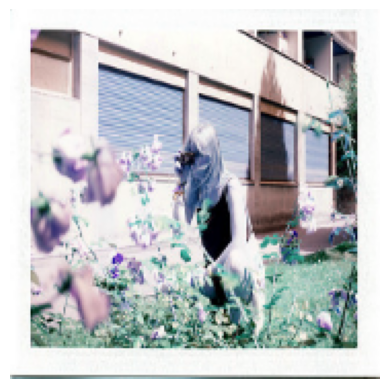

In [55]:
plt.axis('off')
plt.imshow(X[0])

## Newly generated training sample using data augmentation

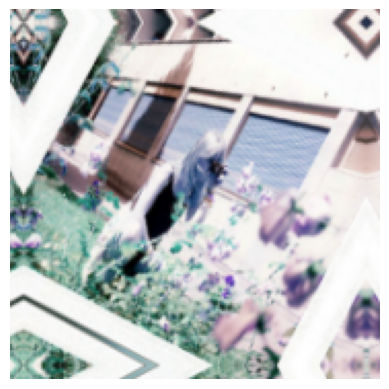

In [56]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## Train the model using data augmentation and a drop out layer

In [57]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.3433 - loss: 1.5048
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5387 - loss: 1.1033
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6015 - loss: 1.0195
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6485 - loss: 0.9096
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6639 - loss: 0.8637
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6795 - loss: 0.8258
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6936 - loss: 0.8196
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7190 - loss: 0.7215
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7235 - loss: 0.7401
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7201 - loss: 0.7027
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7452 - loss: 0.6607
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy:

In [58]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7199 - loss: 1.0273


[0.954677402973175, 0.7298474907875061]

### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 72.98%